In [ ]:
# !python data/data.py

In [ ]:
# !python models/utils.py

**Speaker Verification (Evaluation) of wavlm_base_plus on list of trial pairs (vox1)**

In [1]:
from evaluation import init_model, evaluate
from data import VoxCeleb1
import torch
import warnings
warnings.filterwarnings("ignore")

In [2]:
vox1_dat = VoxCeleb1('data/vox1')

In [3]:
CHECKPOINT = 'models/checkpoints/wavlm_base_plus_nofinetune.pth'

In [4]:
model = init_model(CHECKPOINT)

Using cache found in /home/raid/.cache/torch/hub/s3prl_s3prl_main
ESPnet is not installed, cannot use espnet_hubert upstream


In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [6]:
auc_score, acc_score, f1, precision, recall, eer, tar_1_far, speaker_id_acc = evaluate(model, vox1_dat, 'data/vox1_trial_pairs.txt', batch_size=128, device=device)

100%|██████████| 294/294 [07:36<00:00,  1.55s/it]

AUC: 0.9988, Accuracy: 0.8253, F1: 0.7883, Precision: 1.0000, Recall: 0.6506
EER: 1.51%, TAR@1% FAR: 0.9777, Speaker Identification Accuracy: 0.9849


In [7]:
print(f"Speaker Identification accuracy: {speaker_id_acc * 100:.4f}%")

Speaker Identification accuracy: 98.4925%


In [8]:
print(f"EER: {eer:.4f}%")

EER: 1.5099%


**Finetuning wavlm_base_plus on VoxCeleb2 Dataset using LoRA and ArcFace Loss**

In [6]:
from lora_finetune import train_lora, replace_linear_with_lora
from data import VoxCeleb2

In [7]:
vox2_dat = VoxCeleb2('data/vox2')

In [8]:
model.to(device)

ECAPA_TDNN(
  (feature_extract): UpstreamExpert(
    (model): WavLM(
      (feature_extractor): ConvFeatureExtractionModel(
        (conv_layers): ModuleList(
          (0): Sequential(
            (0): Conv1d(1, 512, kernel_size=(10,), stride=(5,), bias=False)
            (1): Dropout(p=0.0, inplace=False)
            (2): Fp32GroupNorm(512, 512, eps=1e-05, affine=True)
            (3): GELU(approximate='none')
          )
          (1-4): 4 x Sequential(
            (0): Conv1d(512, 512, kernel_size=(3,), stride=(2,), bias=False)
            (1): Dropout(p=0.0, inplace=False)
            (2): GELU(approximate='none')
          )
          (5-6): 2 x Sequential(
            (0): Conv1d(512, 512, kernel_size=(2,), stride=(2,), bias=False)
            (1): Dropout(p=0.0, inplace=False)
            (2): GELU(approximate='none')
          )
        )
      )
      (post_extract_proj): Linear(in_features=512, out_features=768, bias=True)
      (dropout_input): Dropout(p=0.1, inplace=False)

In [9]:
replace_linear_with_lora(model, device)

In [10]:
train_loss, test_acc, test_auc, test_f1, test_precision, test_recall = train_lora(model, vox2_dat, epochs=10, batch_size=128, device=device, model_save=True, save_path='models/wavlm_base_lora_finetune.pth')

Epoch 1/10


100%|██████████| 234/234 [02:59<00:00,  1.31it/s]


Epoch 2/10


100%|██████████| 234/234 [03:02<00:00,  1.28it/s]


Epoch 3/10


100%|██████████| 234/234 [03:02<00:00,  1.28it/s]


Epoch 4/10


100%|██████████| 234/234 [03:02<00:00,  1.28it/s]


Epoch 5/10


100%|██████████| 234/234 [03:01<00:00,  1.29it/s]


Epoch 6/10


100%|██████████| 234/234 [03:02<00:00,  1.28it/s]


Epoch 7/10


100%|██████████| 234/234 [03:02<00:00,  1.28it/s]


Epoch 8/10


100%|██████████| 234/234 [03:02<00:00,  1.28it/s]


Epoch 9/10


100%|██████████| 234/234 [03:02<00:00,  1.28it/s]


Epoch 10/10


100%|██████████| 234/234 [03:02<00:00,  1.28it/s]


In [11]:
import matplotlib.pyplot as plt
import numpy as np

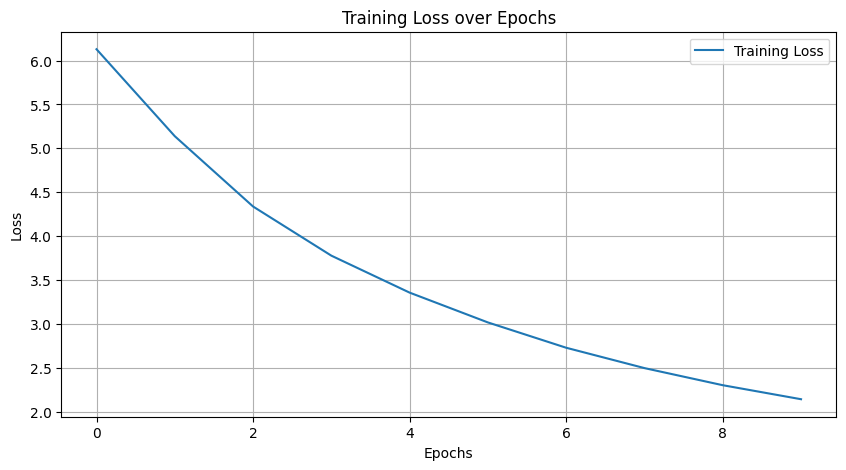

In [12]:
# Plotting the training loss
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(train_loss)), train_loss, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.grid()
plt.show()

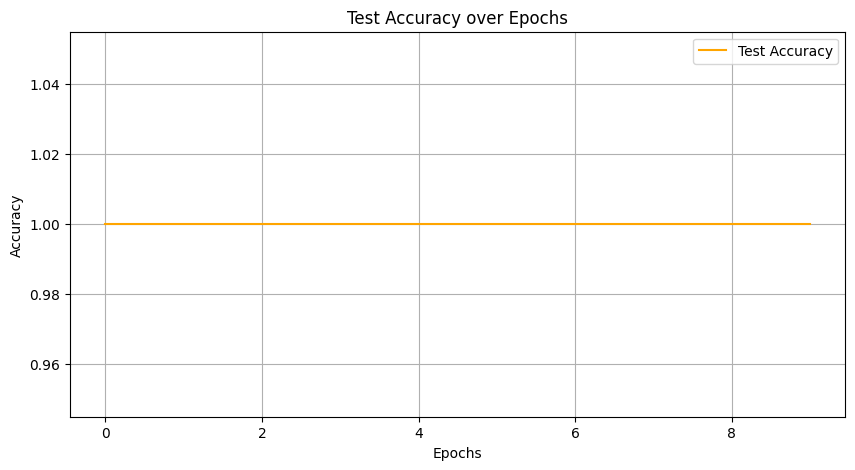

In [13]:
# Plotting the test accuracy
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(test_acc)), test_acc, label='Test Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Test Accuracy over Epochs')
plt.legend()
plt.grid()
plt.show()

In [14]:
auc_score, acc_score, f1, precision, recall, eer, tar_1_far, speaker_id_acc = evaluate(model, vox1_dat, 'data/vox1_trial_pairs.txt', batch_size=128, device=device)

100%|██████████| 294/294 [07:35<00:00,  1.55s/it]

AUC: 0.9845, Accuracy: 0.9231, F1: 0.9202, Precision: 0.9551, Recall: 0.8878
EER: 6.79%, TAR@1% FAR: 0.7405, Speaker Identification Accuracy: 0.9321
